<h1><center><strong>Домашка по теории вероятностей</strong></center></h1> <center>Составитель: Захаров Андрей, БЭК 151</center>

### Задача №1
$\underline{Решение}$:

In [85]:
import numpy as np
import csv as csv
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline

In [86]:
apl = pd.read_csv("/Users/Андрей/Downloads/12.csv")
apl

,Position,Team,Points,Goals Scored,Goals Missed,Wins,Drawns,Defeats,Yellow Cards
0,1,Lester,81,68,36,23,12,3,53
1,2,Arsenal,71,65,36,20,11,7,44
2,3,Tottenham,70,69,35,19,13,6,72
3,4,Manchester City,66,71,41,19,9,10,60
4,5,Manchester United,66,49,35,19,9,10,67
5,6,Southampton,63,59,41,18,9,11,59
6,7,Westham,62,65,61,16,14,8,56
7,8,Liverpool,60,63,50,16,12,10,67
8,9,Stock City,51,41,55,14,9,15,52
9,10,Chelsea,50,59,53,12,14,12,61


In [87]:
player = pd.read_csv("/Users/Андрей/Documents/УНИВЕР/2 курс/Тервер/ДЗ/f1.csv")
player

,Position,Player,Goals
0,1,Kane,25
1,2,Vardie,24
2,3,Aguero,24
3,4,Lukaku,18
4,5,Mahrez,17
5,6,Giroud,16
6,7,Defoe,15
7,8,Dini,13
8,9,Sanchez,13
9,10,Aew,12


##### График №1: 
Зависимость положения команд в таблице от числа набранных очков за сезон. Чем больше очков, тем выше позиция в итоговой таблице (логично, не правда ли &#127773;). 

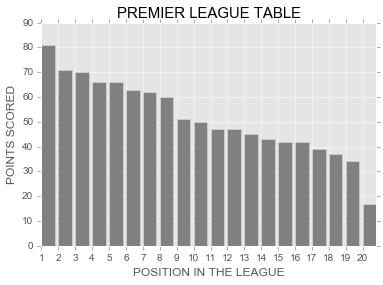

In [88]:
plt.style.use('ggplot')

x=apl['Position']
z1=apl[' Points']

# bar()
fig = plt.figure()
plt.bar(x, z1)
plt.title('PREMIER LEAGUE TABLE',color = 'black', fontsize=15)
plt.grid(True)  
plt.xticks(x)
line1 = plt.bar(x, z1,  color='gray')
plt.ylabel('POINTS SCORED')
plt.xlabel('POSITION IN THE LEAGUE') 

In [89]:
apl_2=apl[0:5]
apl_2

,Position,Team,Points,Goals Scored,Goals Missed,Wins,Drawns,Defeats,Yellow Cards
0,1,Lester,81,68,36,23,12,3,53
1,2,Arsenal,71,65,36,20,11,7,44
2,3,Tottenham,70,69,35,19,13,6,72
3,4,Manchester City,66,71,41,19,9,10,60
4,5,Manchester United,66,49,35,19,9,10,67


##### График №2:
Количество побед и поражений 5 лучших команд. Как видим, лидер имеет наибольшее количество побед при наименьшем количестве поражений в сезоне.

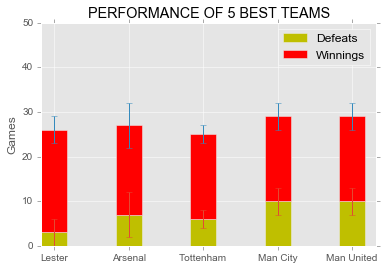

In [90]:
plt.style.use('ggplot')

N = 5
defeatsMeans = apl_2[' Defeats']
winningsMeans = apl_2[' Wins']
defeatsStd = (2, 3, 4, 1, 2)
winningsStd = (3, 5, 2, 3, 3)
ind = np.arange(N)   
width = 0.35       
p1 = plt.bar(ind, defeatsMeans, width, color='y', yerr=winningsStd)
p2 = plt.bar(ind, winningsMeans, width, color='r',
             bottom=defeatsMeans, yerr=winningsStd)

plt.ylabel('Games')
plt.title('PERFORMANCE OF 5 BEST TEAMS')
plt.xticks(ind + width/2., ('Lester', 'Arsenal', 'Tottenham', 'Man City', 'Man United'))
plt.yticks(np.arange(0, 55, 10))
plt.legend((p1[0], p2[0]), ('Defeats', 'Winnings'))

plt.show()

In [68]:
apl_3=apl[15:20]
apl_3

,Position,Team,Points,Goals Scored,Goals Missed,Wins,Drawns,Defeats,Yellow Cards
15,16,Bournemouth,42,45,67,11,9,18,53
16,17,Sunderland,39,48,62,9,12,17,68
17,18,Newcastle United,37,44,65,9,10,19,62
18,19,Norwich,34,39,67,9,7,22,63
19,20,Aston Villa,17,27,76,3,8,27,76


##### График №3:
Количество забитых мячей 5 лучшими и 5 худшими командами. Каждая из топ-команд забила на порядок больше &#9917;, чем любая команда из низшей части таблицы.

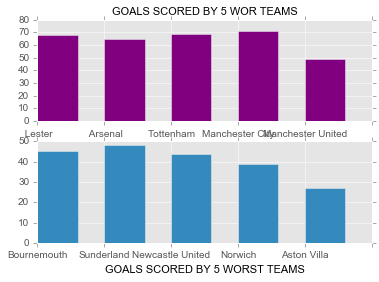

In [95]:
plt.style.use('ggplot')


fig, axes = plt.subplots(ncols=1, nrows=2)
ax1, ax2 = axes.ravel()
ax1.set_title('GOALS SCORED BY 5 WOR TEAMS', color = 'black', fontsize=11)

# bar graphs 1
x = apl_2['Position']
z1 = apl_2[' Goals Scored']
width = 0.6
ax1.bar(x, z1, width, color='purple')

ax1.set_xticklabels(apl_2[' Team'])

# bar graphs 2
x1 = apl_3['Position']
z2 = apl_3[' Goals Scored']
ax2.set_xlabel('GOALS SCORED BY 5 WORST TEAMS',color = 'black', fontsize=11)
ax2.bar(x1, z2, width)
width = 0.7
ax2.set_xticklabels(apl_3[' Team'])

plt.show()

In [72]:
player1=player[0:5]
player1

,Position,Player,Goals
0,1,Kane,25
1,2,Vardie,24
2,3,Aguero,24
3,4,Lukaku,18
4,5,Mahrez,17


##### График № 4:
Количество забитых голов лучшими снайперами в лиге. Причем, те игроки, которые в данном состязании заняли места ниже третьего, значительно уступают первой тройке лидеров. 

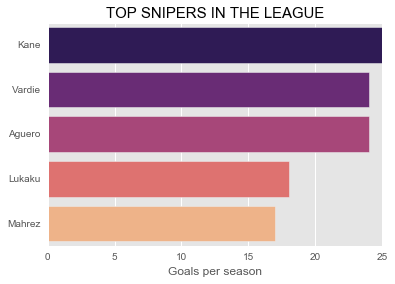

In [73]:
plt.title('TOP SNIPERS IN THE LEAGUE',color = 'black', fontsize=15)

df = pd.DataFrame(index=player1['Player'],data={'col1':player1[' Goals']})
ax = sns.barplot(x=player1[' Goals'], y=df.index.values, data=df,palette='magma')

ax.set(xlabel='Goals per season')

plt.show()

##### График №5:
Количество желтых карточек, полученных пятью различными командами, выбранными из общей таблицы. Как видно из рисунка, данный показатель имеет довольно большой разброс между этими клубами.

##### График №6:
Количество голов, забитых командами за сезон в зависимости от занимаемой позиции в итоговой таблице. Можно заметить, что в большинстве случаев более низкое положение клуба в таблице соответсвтует меньшему количеству забитых мячей (поэтому движение точек имеет направление вправо-вниз).

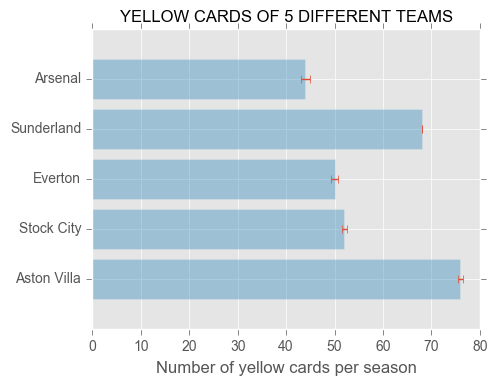

In [75]:
plt.rcdefaults()
plt.style.use('ggplot')

team = ('Aston Villa', 'Stock City','Everton', 'Sunderland','Arsenal')
y_pos = np.arange(len(team))
performance = [76,52,50,68,44]
error = np.random.rand(len(team))
plt.figure(figsize=(400/80, 300/80), dpi=80)

plt.barh(y_pos, performance, xerr=error, align='center', alpha=0.4)
plt.yticks(y_pos, team)
plt.xlabel('Number of yellow cards per season')
plt.title('YELLOW CARDS OF 5 DIFFERENT TEAMS',color = 'black', fontsize=12)

plt.show()

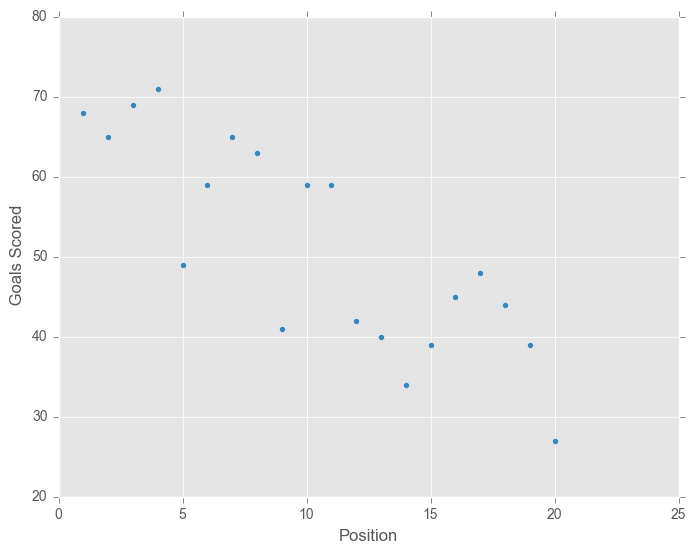

In [76]:
apl.plot(x='Position', y=' Goals Scored', kind='scatter')

##### График №7:
На данном графике показан разброс значений всех рассматриваемых параметров в итоговой таблице. Видим, что наибольшим разбросом обладает такой параметр как "Points" (т.е. количество очков за сезон), в то время как наименьший присущ параметру "Drawns" (т.е. количеству ничьих). 

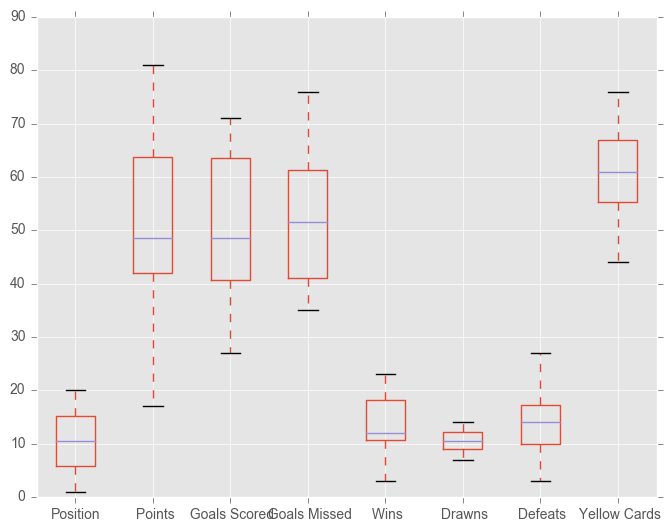

In [77]:
apl.plot(kind='box')

##### График №8:
Общая таблица игроков, забивших наибольшее количество голов за сезон. Не обращая внимания на первых трех игроков, можно отметить, что разница в данном показателе между одним футболистом и тем, кто следует за ним, довольно небольшая.

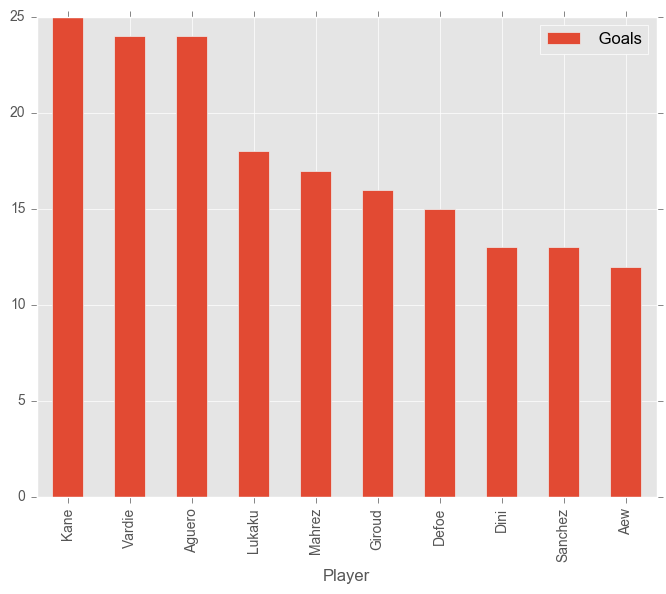

In [78]:
player.plot(x='Player', y=' Goals', kind='bar')

##### График №9:
На данном графике отмечены точки для каждой команды, отражающие показатель "Кол-во забитых голов - Кол-во пропущенных голов". Стоит заключить, что количество клубов, забивших больше мячей, чем пропустивших, равно количеству команд, имеющих обратную ситуацию. 

C:\Users\Андрей\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


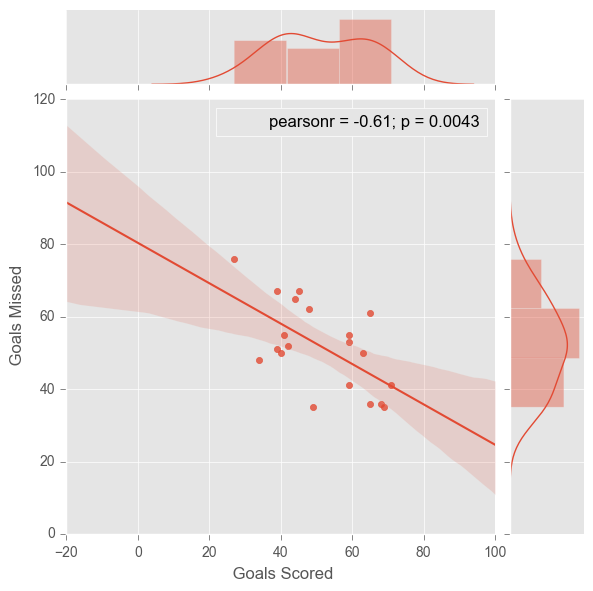

In [79]:
sns.jointplot(x=' Goals Scored', y=' Goals Missed', 
              data=apl, kind='reg')

## Задача №2
$\underline{Решение}$:

1) 

C:\Users\Андрей\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


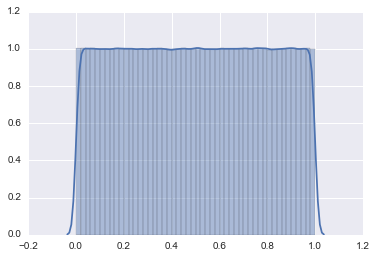

In [37]:
X1 = stats.uniform(0,1)
values1 = X1.rvs(10000000)
sns.distplot(values1)

C:\Users\Андрей\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


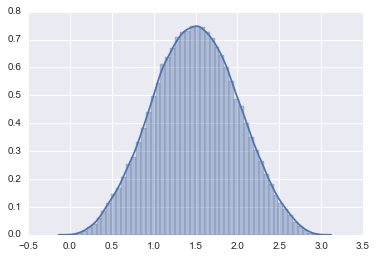

In [55]:
values2=x.rvs(100000)+x.rvs(100000)+x.rvs(100000)
sns.distplot(values2)

C:\Users\Андрей\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


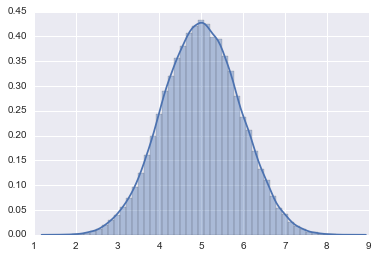

In [52]:
i = 0
values3= x.rvs(100000)
while i<9:
    values3=values3 + x.rvs(100000)
    i+=1
    
sns.distplot(values3)

C:\Users\Андрей\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


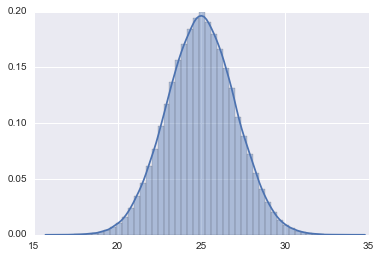

In [54]:
i = 0
values4= x.rvs(100000)
while i<49:
    values4=values4 + x.rvs(100000)
    i+=1
    
sns.distplot(values4) 

2) Поиск вероятности $ P$ $(X_1+X_2+X_3>2) $:

In [6]:
values10 = x.rvs(1000000)+x.rvs(1000000)+x.rvs(1000000)

i = 0
k = 0
while i<1000000:
        if values10[i]>2:
            k+=1
        i+=1
print(k/1000000)

0.166716


3) Поиск  $ E$ $(X_{1}^{5}) $:

In [29]:
a = st.uniform(loc=0, scale=1)

In [32]:
values = a.rvs(1000000)

In [33]:
np.mean(values ** 5)

0.16662250838946732

Поиск $Var$ $(X_1/(1 + X_2^{2}))$:

In [60]:
var = x.rvs(1000000)
var1 = var**2
var2 = (x.rvs(1000000))/(1+var1)
print(var2.var())

0.0599717885841


4) Поиск медианы:

In [38]:
x_1=np.random.uniform(0,1,100000) 
x_2=np.random.uniform(0,1,100000) 
for i in range(100000): 
    x_1[i]=x_1[i]+1 
    x_2[i]=x_2[i]+3 
    x_1[i]=x_1[i]/x_2[i] 
md=np.percentile(x_1, 50) 

md

0.42866748005734567

Поиск 25% квантиля:

In [39]:
x_1=np.random.uniform(0,1,100000) 
x_2=np.random.uniform(0,1,100000) 
for i in range(100000): 
    x_1[i]=x_1[i]+1 
    x_2[i]=x_2[i]+3 
    x_1[i]=x_1[i]/x_2[i] 
cv=np.percentile(x_1, 25)

cv

0.35716894967218149

## Задача №3 (22. Мартышка и Шекспир)
$\underline{Решение}$:

1) Для начала стоит обратить внимание на кажущуюся незаметной, но довольно важную фразу - "рано или поздно". С точки зрения теории вероятностей данное словосочетание означает, что вероятность искомого события стремится к единице при условии стремления времени к бесконечности. Таким образом, каким бы невероятным не было утверждение о том, что обычная мартышка, наугад нажимающая клавиши на печающей машинке, рано или поздно напечатает собрание сочинений Шекспира или Льва Толстого, оно тем не менее является достоверным, конечно лишь при условии неограниченного количества времени, данного мартышке.

Докажем данное утверждение в более явном виде. Как мы знаем из курса тервера, два события независимы, если вероятность пересечения событий равна произведению вероятностей этих событий. 

Теперь предположим, что пишущая машинка имеет 50 клавиш. Допустим, перед мартышкой стоит задача напечатать слово "обезьяна". Вероятность того, что первым напечатанным символом станет буква "о", равна 1/50, ровно как и вероятность того, что следующим символом станет буква "б" и так далее, поскольку эти события независимы. Таким образом, вероятность того, что мартышка напечатает заданное слово, равна $\dfrac{1}{50^6}$.

С другой стороны, шанс не напечатать слово "обезьяна" в каждом блоке по 8 букв равен $1 - \dfrac{1}{50^6}$. Поскольку каждый блок печатаетcя независимо, шанс не напечатать данное слово в любом из первых n блоков по 8 букв равен $(1 - \dfrac{1}{50^6})^n$. Причем в данном случае найденная формула может быть интерпретирована как вероятность того, что ни одна из n обезьян не напечатает слово "обезьяна" правильно с первой попытки. Более того, из этой формулы видно, что чем больше n, тем данная вероятность уменьшается.

Подобная формула применяется для любой другой строки символов конечной длины. При этом если заменить слово "обезьяна" на текст «Гамлета», показатель степени увеличится с 8 до числа символов в этом тексте, но суть от этого не изменится. Таким образом, если устремить n к бесконечности, выражение $(1 - \dfrac{1}{50^6})^n$ будет стремиться к нулю. Иными словами, при бесконечном количестве обезьян вероятность не напечатать текст любой сложности будет близка к нулю. Однако условие наличия бесконечного количества обезьян равносильно условию наличия одной обезьяны, печатающей при неограниченном количестве времени.

В результате получаем, что вероятность того, что одна обезьяна рано или поздно не напечатает полное собрание сочинений Шекспира стремится к нулю, значит вероятность того, что она его напечает, стремится к единице. 

2)  Обозначим количество нажатий до появления слова «abracadabra» за $X$. Найдем $E(X)$.

Для упрощения ситуации предположим, что на печатной машинке есть всего 26 кнопок, соответствующих 26 буквам латинского алфавита. 

Первоначально можно рассуждать следующим образом: вероятность правильно напечатать нужную букву из 26 возможных равна $\dfrac{1}{26}$, а вероятность правильно напечатать нужные 11 букв подряд соответственно равна $\dfrac{1}{26^{11}}$. Таким образом, если набор 11 букв это одно испытание, то математическое ожидание количества испытаний равно $\dfrac{1}{\frac{1}{26^{11}}} = 26^{11}$. 

Однако данный ответ является не совсем точным.

Для нахождения точного математического ожидания $X$ смоделируем следующую ситуацию. Допустим, что мы открываем справедливое казино, суть которого заключается в том, что перед каждым нажатием обезьяной клавиши к нам приходит новый игрок и ставит 1 д.е. на определенную букву. Так, вначале игрок поставит на букву "a". Если он не угадывает, то уходит домой. Если же он угадывает, то ставит все выигранные деньги на то, что следующая буква будет "b". В случае очередного выигрыша, он ставит на то, что следующая буква будет "р" и так далее.

Данная игра продолжается до тех пор, пока не появится слово «абракадабра» (за искомое количество нажатий $X$). После появления данного слова мы закрываем казино. 

Поскольку казино справедливое, математическое ожидание выигрыша равно нулю. Таким образом, если игрок ставит 1 д.е., он должен получить 26 д.е, поскольку вероятность правильно угадать букву как раз равна $\frac{1}{26}$. В итоге - ожидаемое изменение в благосостоянии игрока равно $\dfrac{25}{26}\times(-1) + \dfrac{1}{26}\times(+25) = 0$.

Как уже было сказано, игра длится $X$ нажатий. Сколько заработает наше казино? Напомним, что перед каждым нажатием клавишы новый игрок приходит и ставит 1 д.е. и, если он выигрывает, он будет ставить только все деньги, которые заработал. Поэтому наша выручка будет в точности равна $X$ д.е.

Сколько наше казино заплатит победителям? Заметим, что победителями в последнем раунде становятся те, кто ставит на А. Существует один игрок, который пришел в казино перед последней буквой и выиграл $26$ д.е. на своей ставке. Также был игрок, который пришел тремя нажатиями ранее, он сделал четыре успешные ставки (abra) и выиграл соответственно $26^4$. Наконец, существует наиболее успешный игрок, который прошел через все слово "abracadabra" и выиграл $26^{11}$. Таким образом, наше казино должно отдать $26^{11}+26^4+26$ д.е. в итоге.

Наконец, сделаем следующее уточнение: наше казино является справедливым, даже когда мы его закрываем. Поэтому расходы казино должны быть равны доходам казино. Наш доход равен $X$ д.е, в то время как ожидаемые расходы равны $26^{11}+26^4+26$, поэтому $E (X - (26^{11}+26^4+26)) = 0$. Откуда $E(X) = 26^{11}+26^4+26$.


Что касается $VAR(X)$, данную величину можно найти аналогичным способом, записав другое уравнение вида $E(X^2 - T)=0$, где T - совокупное благосостояние всех игроков (напомним, что наше казино справедливое, поэтому правая часть данного уравнения приравнивается к 0). Отсюда найдем $E(X^2)$, а величина $(E(X))^2$ соответственно равна $(26^{11}+26^4+26)^2$ из предыдущего пункта.  